# Matplotlib Overview

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Overview

Create a Figure, composed of Axes

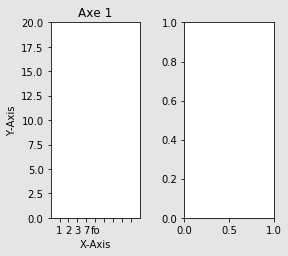

In [99]:
# Setup
fig1 = plt.figure(
    figsize=plt.figaspect(2.0), # size of the figure
    facecolor=(0, 0, 0, .1)) # background color

ax1 = fig1.add_subplot(221) # (row-col-num) of axis
ax2 = fig1.add_subplot(222) # (row-col-num) of axis

# Legend
ax1.set_title('Axe 1') # title
ax1.set_ylabel('Y-Axis') # y-label
ax1.set_xlabel('X-Axis') # x-label
ax1.legend(loc='best')

# Limits
ax1.set_ylim([0,20]) # values for y
ax1.set_xlim([0,10]) # values for x

# Ticks
ax1.xaxis.set(
    ticks=range(1,10),
    ticklabels=[1,2,3,7,'fo'])

# Axis spacing
fig1.subplots_adjust(
    wspace=0.5, #space between plots
    hspace=0.3,
    left=0.125,
    right=0.9,
    bottom=0.1)

plt.show()

1D series

![title](MPL_viz/plot_example.png)
![title](MPL_viz/scatter_example.png)
![title](MPL_viz/bar_example.png)
![title](MPL_viz/fill_example.png)

Data Distributions

![title](MPL_viz/statistical_example.png)

2D Arrays

![title](MPL_viz/imshow_example.png)
![title](MPL_viz/pcolor_example.png)
![title](MPL_viz/contour_example.png)

Vector Fields

![title](MPL_viz/vector_example.png)

Exercise

In [154]:
np.random.seed(1)

# Generate data
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

In [155]:
# Get average of every 100 samples
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1) # range of values

bar_width = x_pos[1] - x_pos[0] # width of bars

In [156]:
# Make future prediction
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

In [157]:
y_avg

array([15.27482478, 24.7488851 , 35.57988715, 37.56840189, 39.79045853,
       44.91376365, 49.08796465, 44.29134032, 47.88407139, 55.94588002])

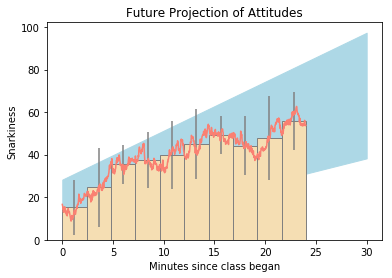

In [176]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Future Projection of Attitudes')
ax.set_ylabel('Snarkiness')
ax.set_xlabel('Minutes since class began')

ax.plot(x_raw,y_raw,color='salmon')
ax.bar(x_pos,y_avg,yerr=y_err,
       color='wheat',
       width=bar_width,
       align='edge',
       edgecolor='gray',ecolor='gray')
ax.fill_between(x_pred,y1=y_min_pred,y2=y_max_pred,color='lightblue')
plt.show()

## Vocabulary

**Colornames**

(b,g,r,c,m,y,k,w) = (blue, green, red, cyan, magenta, yellow, black, white) 

(lightblue, lightgreen, darkblue, darkred, darkyellow, salmon)

**Markers**

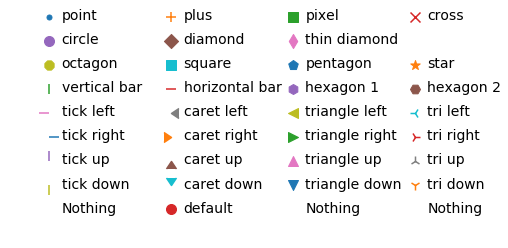

In [179]:
xs, ys = np.mgrid[:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "default", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()
plt.show()

**Linestyles**

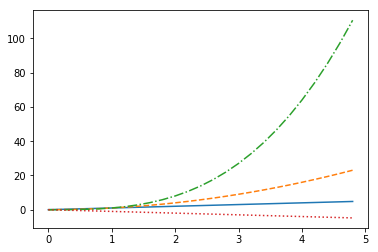

In [180]:
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t, '-', t, t**2, '--', t, t**3, '-.', t, -t, ':')
plt.show()

**Colormaps**

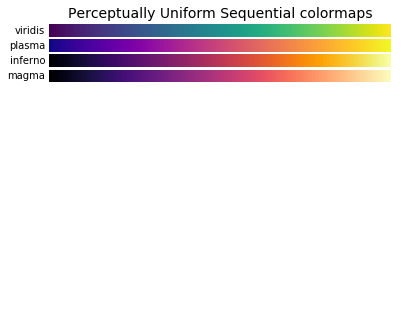

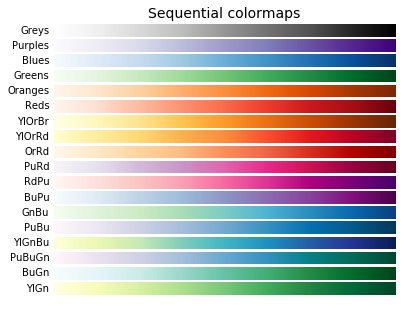

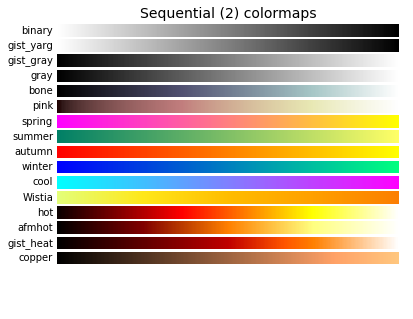

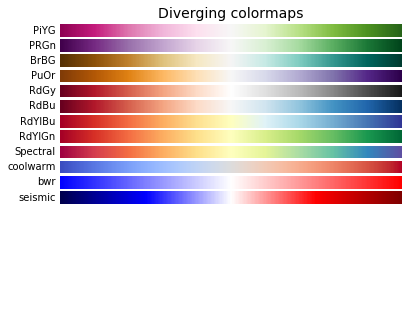

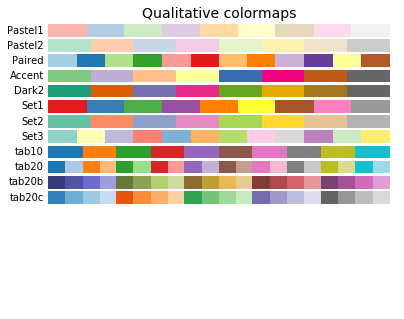

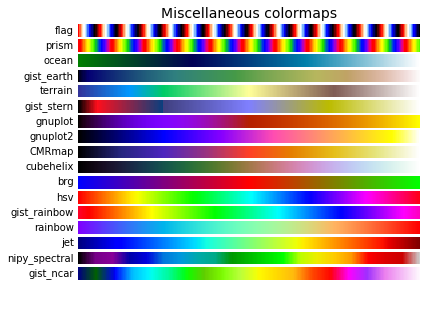

In [181]:
import numpy as np
import matplotlib.pyplot as plt


# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

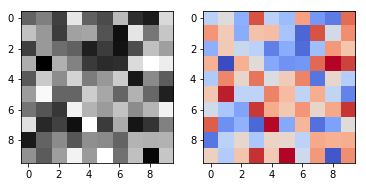

In [182]:
fig, (ax1, ax2) = plt.subplots(1, 2)
z = np.random.random((10, 10))
ax1.imshow(z, interpolation='none', cmap='gray')
ax2.imshow(z, interpolation='none', cmap='coolwarm')
plt.show()